# Phase-I Pixel detector: Efficiency Measurements

The purpose of this notebook and presentation is to provide documentation and validation of the efficiency measurements.

<div style="margin-top: 20px; display: inline-block;"><a href="mailto:adam.hunyadi@cern.ch?Subject=Phase-I%20Pixel detector:%20Efficiency%20Measurements" target="_top">adam.hunyadi@cern.ch</div>
<div style="margin-left: 30px; margin-right: 30px; display: inline;">- - -</div>
<div style="display: inline;">2017. 05. 17.</div>

## Tools used
The PhaseIPixelNtuplizer package (used to process the CMSSW output) is available at:

https://github.com/jkarancs/PhaseIPixelNtuplizer

The PhaseIEfficiencyPlotter package (used to create plots) is available at:

https://github.com/hunyadix/PhaseIEfficiencyPlotter

## Input used for the efficiency measurements

For input I generated a RECO -> PhaseIPixelNtuplizer -> PhaseIEfficiencyPlotter ntuple with
<ul>
<li> 50,000 events, </li>
<li> each of them having a pileup value of 40, </li>
<li> in both CMSSW 90X and CMSSW 91X,
<li> with the value of 0.8 set as double column efficiciency for all the detector parts </li>
</ul>

to validate the efficiency measurements and to fine-tune the efficiency filter cut thresholds.

The loading of the toolkit, and opening of the input file is done here:

In [1]:
import ROOT, sys
ROOT.gStyle.SetPalette(1)
sys.path.append('../python/')
inputFile = ROOT.TFile.Open("/data/hunyadi/CMSSW/PhaseIEfficiencyPlotter_2017_04_02/CMSSW_9_1_0_pre3/src/DPGAnalysis/PhaseIEfficiencyPlotter/histograms_delayscan.root", "READ")

## Validation - Basics and drawing tools
The plotter code should have generated a directory system with different directories based on the conditions. Since the ntuple only contains data from the same kind of simulation, it should only have one main directory:

In [2]:
mainDir = ROOT.gDirectory.Get(
    ROOT.gDirectory.GetListOfKeys().First().GetTitle())

The file contains categorical plot type subdirectories. This is the list of all the categories:

In [3]:
for index, subDir in enumerate(mainDir.GetListOfKeys()):
    sys.stdout.write("%-49s " % subDir.GetTitle())
    if index % 2 == 1: print ""

layersDisksEfficiencyPlots                        rechitOccupancyROCPlots                           
efficiencyROCPlots                                rechitOccupancyPhiVsZPlots                        
efficiencyPhiVsZPlots                             rechitOccupancyGlyVsGlxPlots                      
efficiencyGlyVsGlxPlots                           vtxNtrkEfficiencyPreCutsPlots                     
vtxNtrkEfficiencyWithCutsPlots                    ptEfficiencyPreCutsPlots                          
ptEfficiencyWithCutsPlots                         striphitsEfficiencyPreCutsPlots                   
striphitsEfficiencyWithCutsPlots                  lxEfficiencyPreCutsPlots                          
lxEfficiencyWithCutsPlots                         lyEfficiencyPreCutsPlots                          
lyEfficiencyWithCutsPlots                         lyVsLxEfficiencyPreCutsPlots                      
lyVsLxEfficiencyWithCutsPlots                     clustDistPreCutsPlots                    

To draw the contents of these categories, a drawing tool is introduced here:

In [4]:
def mergeCanvasRow(canvas, padIndex):
    if padIndex % 2 == 0: print "Function mergeCanvasRow() was called on invalid taget."
    original = canvas.cd(padIndex)
    original.SetPad("centeredPad","centeredPad", 
        (1.0 - original.GetAbsWNDC()) / 2.0, original.GetAbsYlowNDC(), 
        (1.0 - original.GetAbsWNDC()) / 2.0 + original.GetAbsWNDC(), original.GetAbsYlowNDC() + original.GetAbsHNDC(), 0)
    canvas.cd(padIndex + 1).Delete()
    
def renderToCanvases(name, title, width, height, plotDirectory, plotNames):
    canvases = []    
    for index, plotName in enumerate(plotNames):
        if index % 2 == 0:
            canvases = canvases + [ROOT.TCanvas(name + "_%d" % (index / 2), title, width, height)]
            canvases[-1].Divide(2, 1)
        canvases[-1].cd((index % 2) + 1)
        plot = ROOT.gDirectory.Get(plotDirectory + "/" + plotName)
        if plot: plot.Draw("COLZ")
        else: print "Missing plot: ", plotName
    if(len(plotNames) % 2 == 1): mergeCanvasRow(canvases[-1], 1)
    return canvases

The visualization of the is customized here: 

In [5]:
# ROOT.enableJSVis() # Uncommenting this adds interactive html/javascript elements to the notebook
ROOT.gStyle.SetPalette(1)

## Validation - Plots

### Cluster occupancy on the ROCs

In [ ]:
canvases = renderToCanvases("ClusterOccupancyCanvas", "Cluster Occupancy on the ROCs", 900, 400,
                   mainDir.GetTitle() + "/" + "clusterOccupancyROCPlots",
                   ["clusterOccupancyROCPlots_Layer1",
                    "clusterOccupancyROCPlots_Layer2",
                    "clusterOccupancyROCPlots_Layer3",
                    "clusterOccupancyROCPlots_Layer4",
                    "clusterOccupancyROCPlots_AllDisks"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

In [ ]:
canvases[2].Draw()

### Cluster occupancy on the layers - phi vs Z

In [ ]:
canvases = renderToCanvases("ClusterPhiVsZCanvas", "Cluster occupancy, phi vs Z", 900, 400,
    mainDir.GetTitle() + "/" + "clusterPhiVsZPlots",
    ["clusterPhiVsZPlots_Layer1",
    "clusterPhiVsZPlots_Layer2",
    "clusterPhiVsZPlots_Layer2",
    "clusterPhiVsZPlots_Layer4"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

### Cluster occupancy on the layers - phi vs Z

In [ ]:
canvases = renderToCanvases("ClusterGlyVsGlxCanvas", "Cluster occupancy, Y vs X", 900, 400,
    mainDir.GetTitle() + "/" + "clusterGlyVsGlxPlots",
    ["clusterGlyVsGlxPlots_Disk1",
    "clusterGlyVsGlxPlots_Disk2",
    "clusterGlyVsGlxPlots_Disk3",
    "clusterGlyVsGlxPlots_Disk4",
    "clusterGlyVsGlxPlots_Disk5",
    "clusterGlyVsGlxPlots_Disk6"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

In [ ]:
canvases[2].Draw()

### Rechit occupancy on the ROCs

In [6]:
canvases = renderToCanvases("RechitOccupancyCanvas", "Rechit Occupancy on the ROCs", 900, 400,
    mainDir.GetTitle() + "/" + "rechitOccupancyROCPlots",
    ["rechitOccupancyROCPlots_Layer1_Hits",
    "rechitOccupancyROCPlots_Layer2_Hits",
    "rechitOccupancyROCPlots_Layer3_Hits",
    "rechitOccupancyROCPlots_Layer4_Hits",
    "rechitOccupancyROCPlots_AllDisks_Hits"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

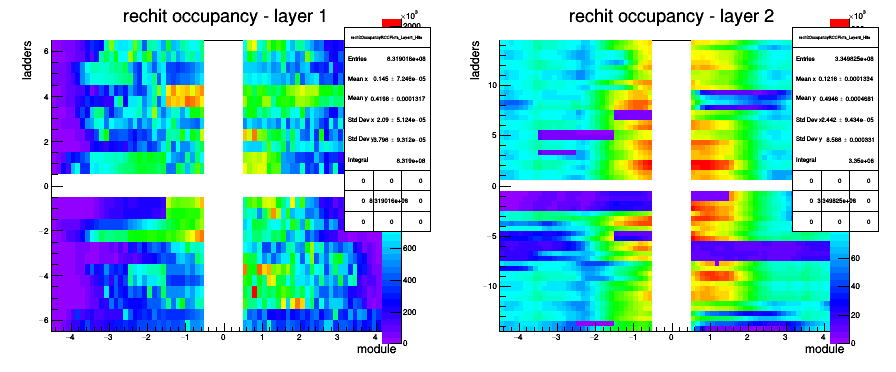

In [7]:
canvases[0].Draw()

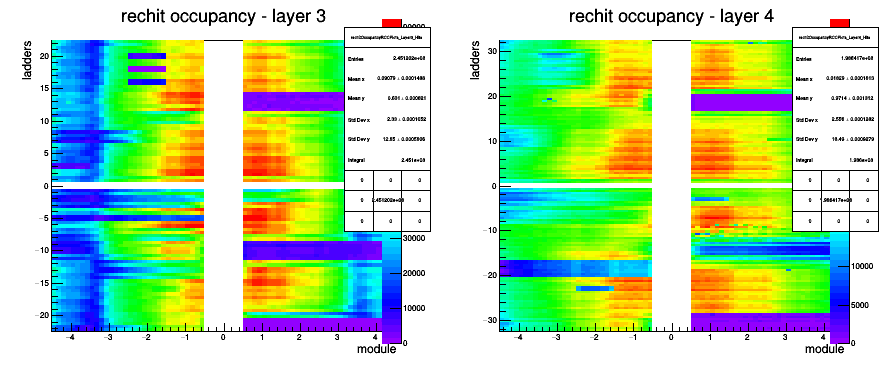

In [8]:
canvases[1].Draw()

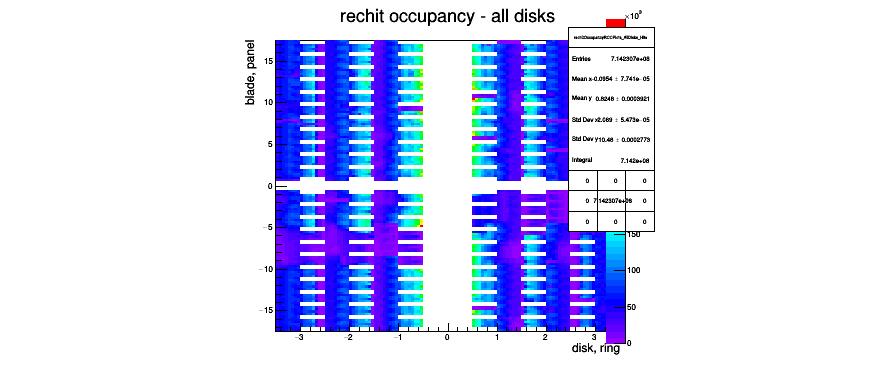

In [9]:
canvases[2].Draw()

### Rechit occupancy on the ROCs

In [ ]:
canvases = renderToCanvases("rechitOccupancyPhiVsZCanvas", "Rechit occupancy, phi vs Z", 900, 400,
    mainDir.GetTitle() + "/" + "rechitOccupancyPhiVsZPlots",
    ["rechitOccupancyPhiVsZPlots_Layer1_Hits",
    "rechitOccupancyPhiVsZPlots_Layer2_Hits",
    "rechitOccupancyPhiVsZPlots_Layer2_Hits",
    "rechitOccupancyPhiVsZPlots_Layer4_Hits"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

### Rechit occupancy on the disks - Y vs X

In [ ]:
canvases = renderToCanvases("RechitOccupancyGlyVsGlxCanvas", "Rechit occupancy, Y vs X", 900, 450,
    mainDir.GetTitle() + "/" + "rechitOccupancyGlyVsGlxPlots",
    ["rechitOccupancyGlyVsGlxPlots_Disk1_Hits",
    "rechitOccupancyGlyVsGlxPlots_Disk4_Hits",
    "rechitOccupancyGlyVsGlxPlots_Disk2_Hits",
    "rechitOccupancyGlyVsGlxPlots_Disk5_Hits",
    "rechitOccupancyGlyVsGlxPlots_Disk3_Hits",
    "rechitOccupancyGlyVsGlxPlots_Disk6_Hits"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

In [ ]:
canvases[2].Draw()

## Efficiency filter cut thresholds - n - 1 plots

The list of the cuts and their functions are listed here:

<table style="
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;">
  <tr>
    <th>#</th>
    <th>Cut name</th>
    <th>Function</th>
  </tr>
   <tr>
   	<td>1</td>
    <td>nvtxCut</td>
    <td>Discards tracks that come from a vertex with low number of tracks.</td>
  </tr>
   <tr>
   	<td>2</td>
    <td>zerobiasCut</td>
    <td>Discards trajectory measurements that come from non MinBias trigger selection (for data).</td>
  </tr>
   <tr>
   	<td>3</td>
    <td>federrCut</td>
    <td>Discards data when FED errors were present.</td>
  </tr>
   <tr>
   	<td>4</td>
    <td>hpCut</td>
    <td>Allows high-purity tracks only.</td>
  </tr>
   <tr>
   	<td>5</td>
    <td>ptCut</td>
    <td>Minimum track transverse momenta.</td>
  </tr>
   <tr>
   	<td>6</td>
    <td>nstripCut</td>
    <td>Number of strip hits required to validate the track presence.</td>
  </tr>
   <tr>
   	<td>7</td>
    <td>d0Cut</td>
    <td>Maximum track-vertex XY distance.</td>
  </tr>
   <tr>
   	<td>8</td>
    <td>dzCut</td>
    <td>Maximum track-vertex Z distance.</td>
  </tr>
   <tr>
   	<td>9</td>
    <td>pixhitCut</td>
    <td>Discards measurements with positions that have been propagated without a validhit in the adjacent detector layers/disks.</td>
  </tr>
   <tr>
   	<td>10</td>
    <td>lxFidCut</td>
    <td>Discards hits on the edges of the modules. For the forward section this is combined with the lyFidCut.</td>
  </tr>
   <tr>
   	<td>11</td>
    <td>lyFidCut</td>
    <td>Discards hits on the edges of the modules. For the forward section this is combined with the lxFidCut.</td>
  </tr>
   <tr>
   	<td>12</td>
    <td>valmisCut</td>
    <td>Discarding hits with invalid states.</td>
  </tr>
   <tr>
   	<td>13</td>
    <td>hitsepCut</td>
    <td>Discarding hits that have ambiguous track assignments (= there are more than one track traversing the detector near the hit).</td>
  </tr>
   <tr>
   	<td>14</td>
    <td>badROCCut</td>
    <td>Excluding non functioning modules and ROCs.</td>
  </tr>
</table>


Many of these cuts have different boundaries than the ones used in the Phase-0 scenario. 

The fine-tuning of the cut values was an iterative process. In order to fine tune a single threshold, the other cuts should be present. The plots with all except one cut values pre-set are referred to as n - 1 plots. I used the Phase-0 cut values as the starting points of the iterations, where it was reasonable to do so.

### Fidicual cuts

#### The Pixel Barrel layers
Since the geometry of the detector is completely different, it is reasonable to start the fine tuning on the most geometry dependent cuts: the fidicual cuts. The scenario of the barrel modules is relatively straightforward:

In [ ]:
canvases = renderToCanvases("lyVsLxEfficiencyOnTheBarrelCanvas", "Ly vs lx efficiency on the barrel layers", 900, 400,
    mainDir.GetTitle() + "/" + "lyVsLxEfficiencyWithCutsPlots",
    ["lyVsLxEfficiencyWithCutsPlots_Layer1_Eff.",
    "lyVsLxEfficiencyWithCutsPlots_Layer2_Eff.",
    "lyVsLxEfficiencyWithCutsPlots_Layer3_Eff.",
    "lyVsLxEfficiencyWithCutsPlots_Layer4_Eff."])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

#### The Pixel Endcap modules
As for the modules on the Pixel Endcaps, it is a completely different matter. Unfortunately, there are lots of different configurations for these modules for which the overlapping areas are completely different. As of the current state of the efficiency measurements, only the center of the forward modules were used, since this is the only place, where there are no overlaps between the adjacent modules. Unfortunately, this is a quite small proportion of the modules, so these cuts throw away most of the endcap trajectory measurements.

If you have any ideas how this approach can be upgraded/replaced, please make sure to comment on the matter! :)

For the orientation of the forward modules, 24 differerent scenarios were separated, and an area with correct efficiency measurement values were selected for each of them. Here I present only some of these cuts. The plots on the left side show the total n - 1 efficiencies. The plots on the right side present the efficiency values on the selected area only.

In [ ]:
preCutsNamePrefix  = "forwardLocalPositionsByOrientationEfficiencyPlots"
postCutsNamePrefix = "forwardLocalPositionsByOrientationWithFidicualCutsEfficiencyPlots"
canvases = renderToCanvases("lyVsLxEfficiencyOnTheEndcapCanvas", "Ly vs lx efficiency on the endcap disks", 900, 400,
    mainDir.GetTitle(),
    ["forwardLocalPositionsByOrientationEfficiencyPlots/"    + preCutsNamePrefix  + "_Disk1Efficiency_2",
    "forwardLocalPositionsWithFidicualCutsEfficiencyPlots/" + postCutsNamePrefix + "_Disk1Efficiency_2",
    "forwardLocalPositionsByOrientationEfficiencyPlots/"    + preCutsNamePrefix  + "_Disk1Efficiency_3",
    "forwardLocalPositionsWithFidicualCutsEfficiencyPlots/" + postCutsNamePrefix + "_Disk1Efficiency_3",
    "forwardLocalPositionsByOrientationEfficiencyPlots/"    + preCutsNamePrefix  + "_Disk2Efficiency_4",
    "forwardLocalPositionsWithFidicualCutsEfficiencyPlots/" + postCutsNamePrefix + "_Disk2Efficiency_4"])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

In [ ]:
canvases[2].Draw()

### Cut for number of tracks in the vertices

As for this cut, it was already introduced in the implementation of the PhaseIPixelNtuplizer. The cut value of 10 tracks seems to be perfectly reasonable.

In [ ]:
canvases = renderToCanvases("vtxNtrkEfficiencyWithCutsPlotsCanvas", "Number of tracks in the vertices", 900, 400,
    mainDir.GetTitle() + "/" + "vtxNtrkEfficiencyWithCutsPlots",
    ["vtxNtrkEfficiencyWithCutsPlots_Hits",
    "vtxNtrkEfficiencyWithCutsPlots_Eff."])

### Transverse momentum cut

The Phase-0 value for this cut was set to 1.0. This value seems to be alll right and was kept.

In [ ]:
canvases = renderToCanvases("ptEfficiencyWithCutsPlotsCanvas", "Pt. of the traj. meas. tracks", 900, 400,
    mainDir.GetTitle() + "/" + "ptEfficiencyWithCutsPlots",
    ["ptEfficiencyWithCutsPlots_Hits",
    "ptEfficiencyWithCutsPlots_Eff."])
canvases[0].Draw()

### Number of strip hits assertion

The code used to plot the number of strip hits: 

In [ ]:
canvases = renderToCanvases("striphitsEfficiencyWithCutsPlotsCanvas", "Strip hits for the traj. meas. tracks", 900, 400,
    mainDir.GetTitle() + "/" + "striphitsEfficiencyWithCutsPlots",
    ["striphitsEfficiencyWithCutsPlots_Hits",
    "striphitsEfficiencyWithCutsPlots_Eff.",])

In [ ]:
canvases[0].Draw()

The distribution of the number of strip hits is quite interesting. Most of the tracks with non-zero strip hits are located in a gaussian with a mean of ~14. Currently the cut value for the minimum number of strip hits is currently set to 10, this means, that most of the tracks in this region are kept.

### D0 and dz cuts

#### The Pixel Barrel layers
The threshold used for the barrel modules and the forward modules were selected separately, since the error of the trajectory measurements on the layer is more dependent on the Z track-vertex distance, and as for the traj. measurements on the disks the precision is more dependent on the XY distance.

The current cut values for d0 of the layers are set to 0.01 on the first layer, and 0.02 on the other layers. There is also a cut value for dz, set to 0.1 just to throw away all the tracks with very bad vertex association.

In [ ]:
canvases = renderToCanvases("d0WithCutsPlotsAllLayersCanvas", "D0 of the traj. meas. tracks on the layers", 900, 400,
    mainDir.GetTitle(),
    ["d0WithCutsPlots/d0WithCutsPlots_AllLayers_Hits",
    "d0WithCutsPlots/d0WithCutsPlots_AllLayers_Eff.",
    "dzWithCutsPlots/dzWithCutsPlots_AllLayers_Hits",
    "dzWithCutsPlots/dzWithCutsPlots_AllLayers_Eff."])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

#### The Pixel Endcap modules

The tracking accuracy of the forward region should be more dependent on d0 than on dz, still neither of these correlations seem to be too strong. The current d0 cut value is set to 0.05 and the dz is 0.5, but it is entirely possible that the dz cut is entirely unnecessary.

In [ ]:
canvases = renderToCanvases("d0WithCutsPlotsAllDisksCanvas", "D0 of the traj. meas. tracks on the disks", 900, 400,
    mainDir.GetTitle(),
    ["d0WithCutsPlots/d0WithCutsPlots_AllDisks_Hits",
    "d0WithCutsPlots/d0WithCutsPlots_AllDisks_Eff.",
    "dzWithCutsPlots/dzWithCutsPlots_AllDisks_Hits",
    "dzWithCutsPlots/dzWithCutsPlots_AllDisks_Eff."])

<center><strong>[Use the up and down arrows to navigate between plots.]</strong></center>

In [ ]:
canvases[0].Draw()

In [ ]:
canvases[1].Draw()

### Hit separation cuts

The distance of the hits is also an important factor in accuracy of the track association. The best trajectory measurements for efficiency measurements are the ones that are far from the trajectory of every other track. The hit separation cut value is currently set to 0.1.

In [ ]:
canvases = renderToCanvases("hitDistWithCutsPlotsCanvas", "Distance of closest non-parent track", 900, 400,
    mainDir.GetTitle() + "/" + "hitDistWithCutsPlots",
    ["hitDistWithCutsPlots_Hits",
    "hitDistWithCutsPlots_Eff.",])
canvases[0].Draw()

### Trajectory measurement cluster assignment distance

The ratio of clusters falsely assigned to a track is highly dependent on the pileup. The association threshold is 0.1 which should keep the false-association minimal. 

In [ ]:
canvases = renderToCanvases("clustDistWithCutsPlotsCanvas", "Traj. meas distance to the closest cluster", 900, 400,
    mainDir.GetTitle() + "/" + "clustDistWithCutsPlots",
    ["clustDistWithCutsPlots_Hits",
    "clustDistWithCutsPlots_Eff.",])
canvases[0].Draw()

## Results of the efficiency measurements

In [ ]:
canvases = renderToCanvases("efficiencyMeasurementsCanvas", "Efficiency measurements", 900, 400,
    mainDir.GetTitle() + "/" + "layersDisksEfficiencyPlots",
    ["layersDisksEfficiencyPlots_Hits",
    "layersDisksEfficiencyPlots_Eff.",])
canvases[0].Draw()

<center><h1> Thank you for your attention </h1></center>